In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
!pip install opencv-python==4.6.0.66

In [3]:
cat4 = cv2.imread(r"C:\Users\HP\Desktop\CV models\CATS_DOGS\train\CAT\4.jpg")

In [4]:
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

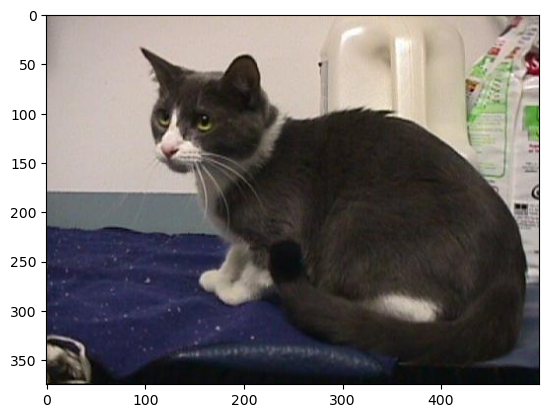

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog2=cv2.imread(r"C:\Users\HP\Desktop\CV models\CATS_DOGS\train\DOG\4.jpg")

In [8]:
dog2.shape

(288, 300, 3)

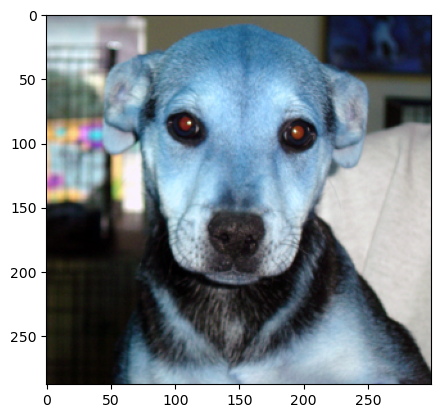

In [9]:
plt.imshow(dog2)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen=ImageDataGenerator(rotation_range = 25,
                             width_shift_range = 0.10,
                             rescale = 1/255,
                             shear_range = 0.1,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = "nearest")

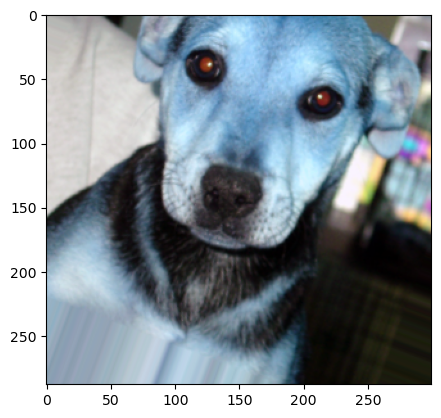

In [12]:
plt.imshow(image_gen.random_transform(dog2))

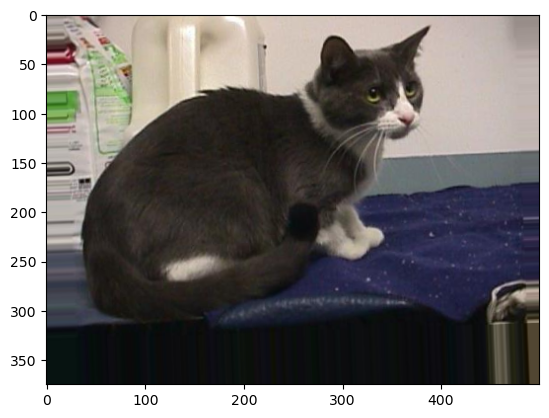

In [13]:
plt.imshow(image_gen.random_transform(cat4))

In [14]:
image_gen.flow_from_directory(r"C:\Users\HP\Desktop\CV models\CATS_DOGS\train")

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory(r"C:\Users\HP\Desktop\CV models\CATS_DOGS\test")

Found 6251 images belonging to 2 classes.


In [16]:
image_shape = (150,150,3)

In [17]:
from keras.models import Sequential
from keras.layers import Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [18]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [20]:
batch = 20
train_image_gen = image_gen.flow_from_directory(r"C:\Users\HP\Desktop\CV models\CATS_DOGS\train",
                                               target_size = (150,150),
                                                batch_size = batch,
                                                class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [21]:
batch = 20
test_image_gen = image_gen.flow_from_directory(r"C:\Users\HP\Desktop\CV models\CATS_DOGS\test",
                                               target_size = (150,150),
                                                batch_size = batch,
                                                class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
results= model.fit_generator( train_image_gen,epochs = 100,
                            steps_per_epoch = 70,
                            validation_data = test_image_gen,
                            validation_steps =10)
            

C:\Users\HP\AppData\Local\Temp\ipykernel_6248\1194706331.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results= model.fit_generator( train_image_gen,epochs = 100,


Epoch 1/100


70/70 [==============================] - 40s 550ms/step - loss: 0.7858 - accuracy: 0.5079 - val_loss: 0.6928 - val_accuracy: 0.4800
Epoch 2/100
70/70 [==============================] - 37s 532ms/step - loss: 0.6938 - accuracy: 0.5479 - val_loss: 0.6797 - val_accuracy: 0.5750
Epoch 3/100
70/70 [==============================] - 40s 566ms/step - loss: 0.6834 - accuracy: 0.5536 - val_loss: 0.6868 - val_accuracy: 0.5650
Epoch 4/100
70/70 [==============================] - 38s 542ms/step - loss: 0.6738 - accuracy: 0.5714 - val_loss: 0.6529 - val_accuracy: 0.6000
Epoch 5/100
70/70 [==============================] - 37s 526ms/step - loss: 0.6758 - accuracy: 0.5714 - val_loss: 0.6507 - val_accuracy: 0.6450
Epoch 6/100
70/70 [==============================] - 38s 546ms/step - loss: 0.6573 - accuracy: 0.6179 - val_loss: 0.6163 - val_accuracy: 0.6900
Epoch 7/100
70/70 [==============================] - 38s 545ms/step - loss: 0.6584 - accuracy: 0.6264 - val_loss: 0.6177 - val_accurac

In [25]:
results.history['accuracy']


[0.5078571438789368,
 0.5478571653366089,
 0.5535714030265808,
 0.5714285969734192,
 0.5714285969734192,
 0.6178571581840515,
 0.6264285445213318,
 0.6421428322792053,
 0.6449999809265137,
 0.6657142639160156,
 0.6621428728103638,
 0.6921428442001343,
 0.6899999976158142,
 0.677142858505249,
 0.6778571605682373,
 0.683571457862854,
 0.6757143139839172,
 0.699999988079071,
 0.7078571319580078,
 0.7028571367263794,
 0.7264285683631897,
 0.7192857265472412,
 0.706428587436676,
 0.7221428751945496,
 0.6992856860160828,
 0.7185714244842529,
 0.7242857217788696,
 0.7378571629524231,
 0.7228571176528931,
 0.7185714244842529,
 0.7421428561210632,
 0.7157142758369446,
 0.7549999952316284,
 0.7428571581840515,
 0.7557142972946167,
 0.7535714507102966,
 0.7464285492897034,
 0.7264285683631897,
 0.7442857027053833,
 0.7557142972946167,
 0.7521428465843201,
 0.7642857432365417,
 0.751988410949707,
 0.7649999856948853,
 0.7528571486473083,
 0.743571400642395,
 0.7742857336997986,
 0.7607142925262451

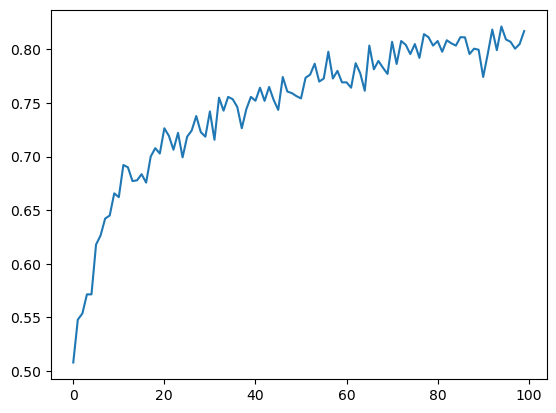

In [48]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])

In [26]:
from tensorflow.keras.models import load_model

In [27]:
new_model = load_model('cat_dog_100epochs.h5')
new_model

In [30]:
dog_file =r'C:/Users/HP/Desktop/CV models/CATS_DOGS/test/DOG/9914.jpg'
dog_file

'C:/Users/HP/Desktop/CV models/CATS_DOGS/test/DOG/9914.jpg'

In [31]:
from keras.preprocessing import image

dog_img=image.load_img(dog_file,target_size=(150,150))

In [32]:
dog_file=image.img_to_array(dog_img)

In [33]:
dog_file.shape

(150, 150, 3)

call the function below only once to not add dimensions again and again

In [34]:
import numpy as np
dog_img=np.expand_dims(dog_file,axis=0)

In [35]:
dog_img.shape

(1, 150, 150, 3)

In [36]:
dog_img=dog_img/255

In [37]:
prediction_prob=new_model.predict(dog_img)

1/1 [==============================] - 0s 170ms/step


In [38]:
print(prediction_prob)

[[0.7332228]]


In [39]:
predictions = new_model.predict(dog_img)

predicted_classes = np.argmax(predictions,axis=1)

1/1 [==============================] - 0s 39ms/step


In [40]:
print(predicted_classes)

[0]


In [43]:
# Load and preprocess your test image (adjust the path accordingly)
img_path ='C:/Users/HP/Desktop/CV models/CATS_DOGS/test/DOG/9914.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Use model to make predictions
predictions = new_model.predict(img)

# Apply a threshold (e.g., 0.5) to get the predicted class label
predicted_class = (predictions > 0.5).astype(int)[0][0]

# Print the predicted class label (0 for cat, 1 for dog)
if predicted_class == 0:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")

1/1 [==============================] - 0s 26ms/step
Predicted class: Dog


# Transfer Learning

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = r'C:/Users/HP/Desktop/CV models/CATS_DOGS/train'
test_dir = r'C:/Users/HP/Desktop/CV models/CATS_DOGS/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(r'C:/Users/HP/Desktop/CV models/CATS_DOGS/test',
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

# Load pre-trained VGG16 model without top layers  # in transfer learning include_top will be kept false
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:',test_acc)


Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8506

In [ ]:
from tensorflow.keras.applications import VGG19
model= vGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [ ]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.applications import Xception
model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [ ]:
from tensorflow.keras.applications import DenseNet121
model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [46]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 [==============================] - 20s 1us/step
